In [197]:
#DEPENDENCIES AND SETUP
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
%matplotlib inline

In [198]:
#Study data files 
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


In [199]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [200]:
# Combine the data into a single dataset
# notes you need to merge data then especifiy how= "let ", on = "Mouse ID"
merged_data = pd.merge(study_results, mouse_metadata , how = "left", on = "Mouse ID")


In [201]:
#look at the data first 5 lines 
print (merged_data.head())

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25  


In [202]:
# Checking the number of mice.
len(merged_data["Mouse ID"].unique())

249

In [203]:
# Our data should be uniquely identified by Mouse ID and Timepoint


# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint

duplicate_mouse_ids = merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [204]:
#identify duplicate Mouse ID-- removed causinfg error 
#duplicate_mouse_ids = duplicate_data['Mouse ID'].unique()

In [205]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data[merged_data['Mouse ID'].isin(duplicate_mouse_ids)== False]

In [206]:
#print(clean_data )
clean_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [207]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())


248

Summary Statistics

In [208]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Assemble into DataFrame summary_stats = pd.DataFrame({ 'Mean Tumor Volume': mean_tumor_vol, 'Median Tumor Volume': median_tumor_vol, 'Tumor Volume Variance': variance_tumor_vol, 'Tumor Volume Std. Dev.': std_dev_tumor_vol, 'Tumor Volume SEM': sem_tumor_vol }) print(summary_stats) This code calculates the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen and assembles the resulting series into a single summary DataFrame. Let me know if you need any further assistance!
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#group by drug regimen 


In [209]:
#create a data frame and mane it clean_data
clean_data =pd.DataFrame(clean_data)

In [210]:
#group by drug regimen
grouped_df = clean_data.groupby('Drug Regimen')


In [211]:
#Calculate statistics
mean_tumor_vol = grouped_df['Tumor Volume (mm3)'].mean()
median_tumor_vol = grouped_df['Tumor Volume (mm3)'].median()
variance_tumor_vol = grouped_df['Tumor Volume (mm3)'].var()
std_dev_tumor_vol = grouped_df['Tumor Volume (mm3)'].std()
sem_tumor_vol = grouped_df['Tumor Volume (mm3)'].sem()

In [212]:
summary_stats = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_vol,
    'Median Tumor Volume': median_tumor_vol,
    'Tumor Volume Variance': variance_tumor_vol,
    'Tumor Volume std. Dev.':std_dev_tumor_vol,
    'Tumor Volume SEM': sem_tumor_vol
})
print(summary_stats)

              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume std. Dev.  Tumor Volume 

In [213]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

In [214]:
#group by "Drug Regimen" and count the number if entries for each regimen
mice_timepoints = merged_data.groupby("Drug Regimen")["Mouse ID"].count()



In [215]:
#sort the values of the bar chart (Largest to smallest)
mice_timepoints_sourted = mice_timepoints.sort_values(ascending=False)

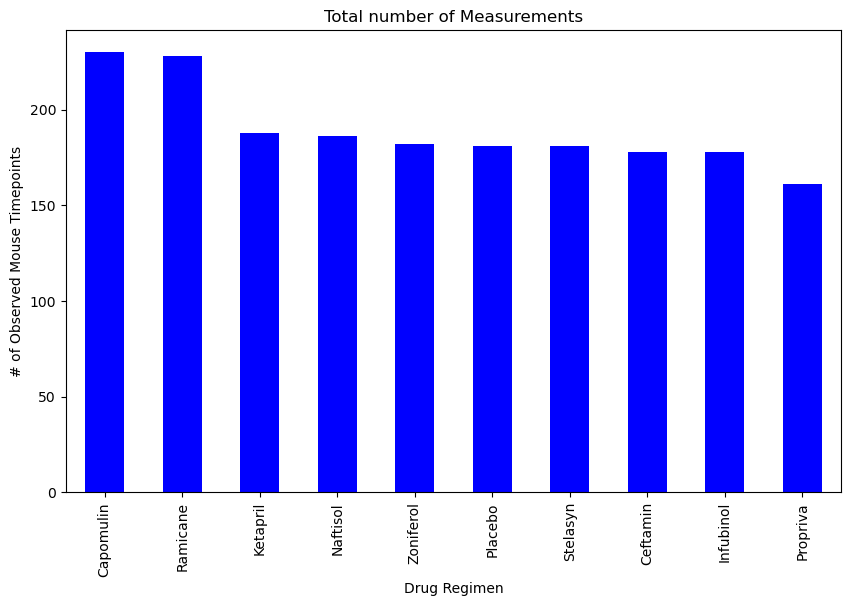

In [220]:
#Create a bar plot using the Pandas built-in plotting fuctionality
ax = mice_timepoints_sourted.plot(kind="bar", figsize=(10,6), color="blue")
# now lets set the labels and title
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("# of Observed Mouse Timepoints")
ax.set_title("Total number of Measurements")
#display the plot
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

In [105]:
# plot the bar chart using pandas

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot